In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np

from CMP_functions.preprocessing import *

from IPython.display import Image
from IPython.core.display import HTML 

import pickle

In [2]:
def get_labels(path):
    with open(f'{path}_real.pk', 'rb') as real_pi:
            reals = pickle.load(real_pi)

    with open(f'{path}_pred_p.pk', 'rb') as pred_p_pi:
            preds_p = pickle.load(pred_p_pi)

    with open(f'{path}_pred_c.pk', 'rb') as pred_c_pi:
            preds_c = pickle.load(pred_c_pi)

    print ('True label')
    print (reals[0])
    print ('Predicted label')
    print (preds_c[0])
    print ('Probability label')
    print (preds_p[0].round(2))

In [3]:
def get_datset(image):
    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(mpimg.imread(image))

In [4]:
def get_curves(image, pos):
    fig = plt.figure(figsize=(20,40))
    ax1 = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(mpimg.imread(image))
    ax1.title.set_text(f'Postive label = {pos}')

# Augmented validation set biases curves

1. Why changing not augmenting validation set Lung prediction performances decrease (not Haem and Cat-Dog)?
2. Why I get ROC curves reflected on the x=y axis if i change positive label from 1 to 0?

I miei dubbi sono sorti quanto ho provato a valutare i modelli con un validation set non agumentato.
I risulti che ho ottenuto sembrano suggerire che quando ho un validation set sbilanciato le curve peggiorano ...di conseguenza ho iniziato a pensare che i risultati fino ad ora hanno un bias dato dal validation augmentato. 
Ho inoltre provato a cambiare la label che viene considerata come positiva nella computazione delle curve e ho ottenuto dei risultati che non riesco a spegarmi (ROC .

### Three Training and validation sets composition

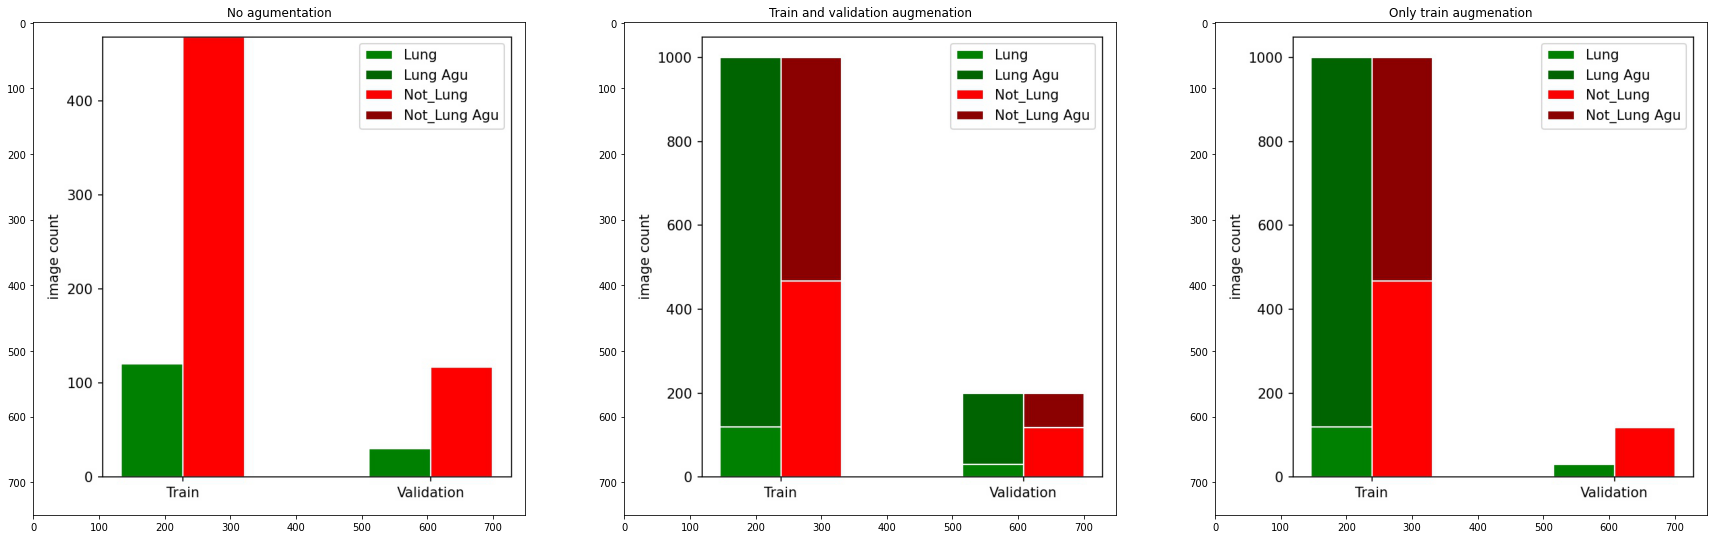

In [5]:
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(mpimg.imread('Lung_no_agumentation.jpg'))
ax1.title.set_text('No agumentation')

ax2 = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(mpimg.imread('Lung_train_test_agumented.jpg'))
ax2.title.set_text('Train and validation augmenation')

ax3 = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(mpimg.imread('Lung_only_train_agumented.jpg'))
ax3.title.set_text('Only train augmenation')

### pos_label argument tested on  0 and 1


In [6]:
# args.pos = [0,1]

# fpr_th, tpr_th, _ = roc_curve(r, p_p, pos_label=args.pos) 
# precision_th, recall_th, _ = precision_recall_curve(r, p_p, pos_label=args.pos)

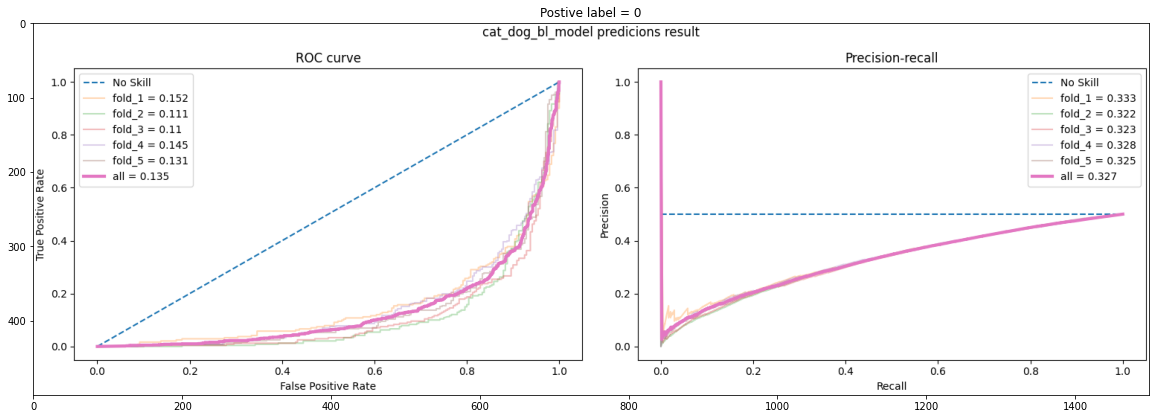

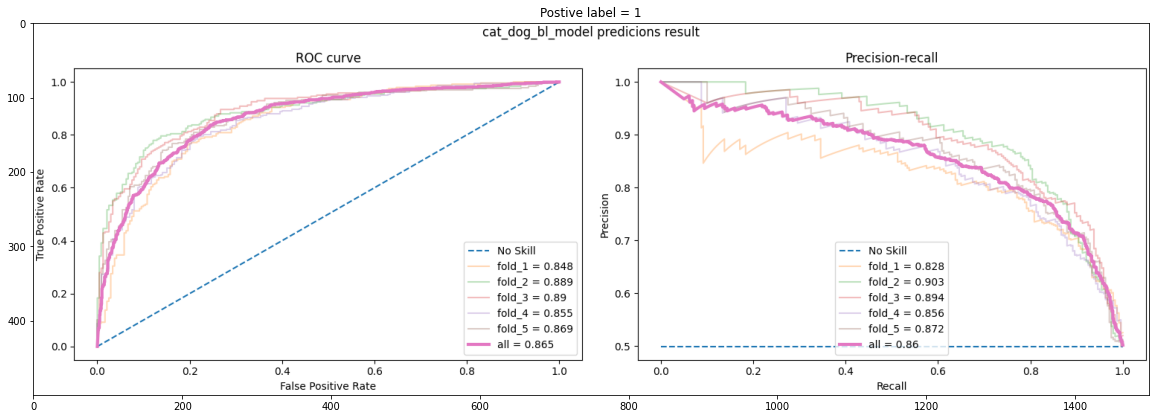

In [7]:
get_curves('cat_dog_bl_model/cat_dog_bl_model_predictions_result_0.png', 0)
get_curves('cat_dog_bl_model/cat_dog_bl_model_predictions_result_1.png', 1)

Nei box sottostanti mostro per ogni configurazione di training/validation:
- label (reali, predette e le relative probabilita)
- proporzione classi e augmented images
- curve ottenute con positive label =1 e =0  

Il primo esempio e Dog vs Cat 1000vs1000 senza augmentation. 

I box seguenti mostrano sempre il confronto Dog vs Cat (unbalanced as lung), Lung vs Not_lung and Haematopoietic vs Not_Haematopoietic.

## Dog vs Cat 1000vs1000 training and 200vs200 validation, our benchmark

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted lab

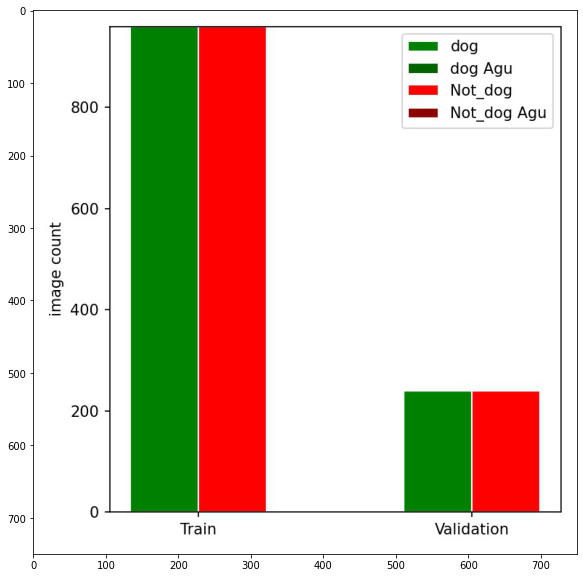

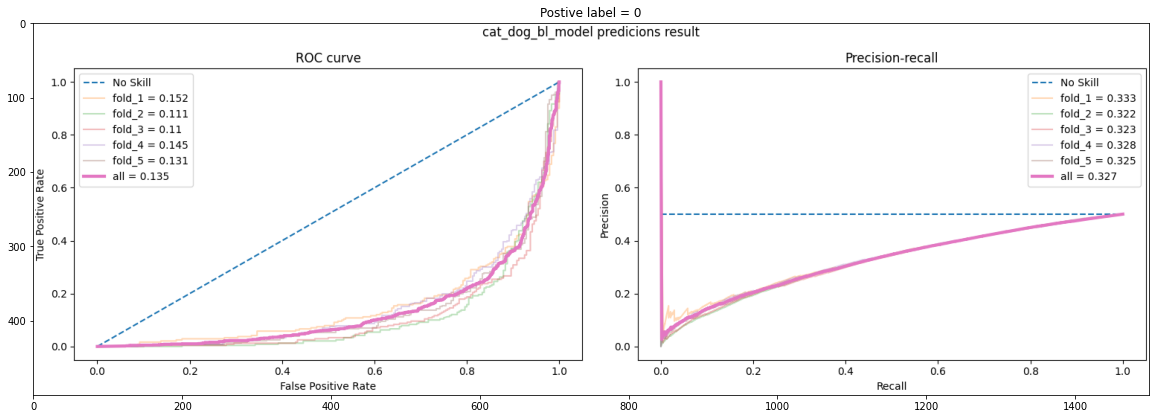

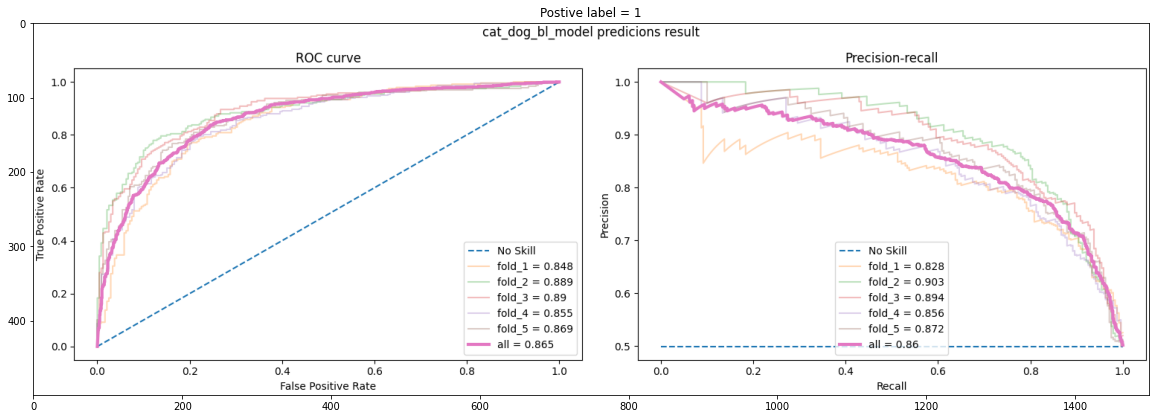

In [8]:
get_datset('dog_cat_no_agumentation.jpg')
get_labels('cat_dog_bl_model/results/cat_dog_bl_model')
get_curves('cat_dog_bl_model/cat_dog_bl_model_predictions_result_0.png', 0)
get_curves('cat_dog_bl_model/cat_dog_bl_model_predictions_result_1.png', 1)

# No augmentation

## Cat dog

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
Probability label
[0.01 0.   0.   0.1  0.   0.47 0.21 0.   0.   0.06 0.   0.   0.   0.
 0.   0.16 0.   0.   0.   0.   0.   0.02 0.26 0.06 0.01 0.02 0.   0.13
 0.06 0.   0.06 0.   0.   0.   0.2  0.   0.   0.33 0.29 0.01 0.05 0.
 0.   0.   0.   0.   0.16 0.   0.   0.   0.   0.   0.23 0.   0.   0.45
 0.   0.   0.01 0.   0.06 0.03 0.77 0.23 0.01 0.   0.   0.   0.01 0.8
 0.

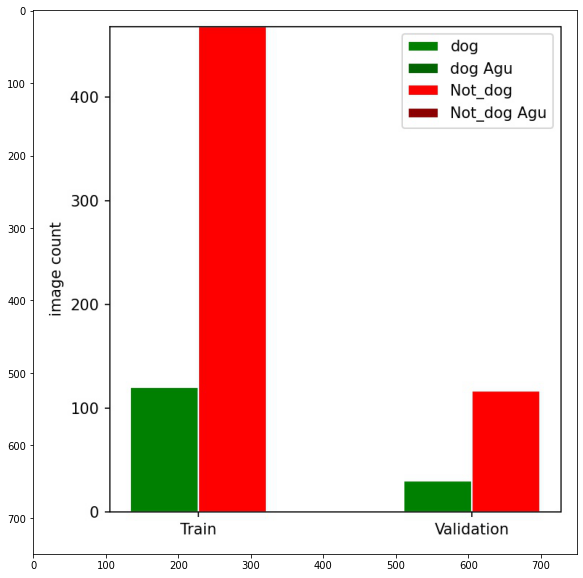

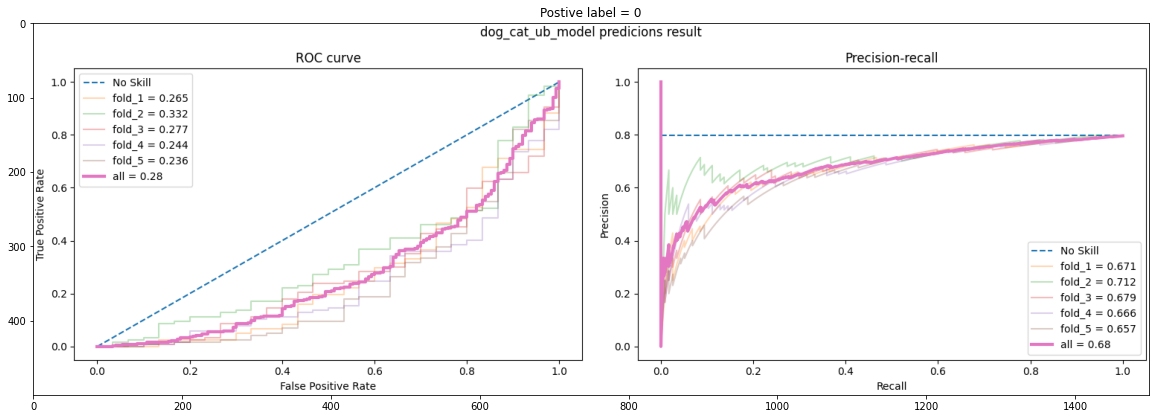

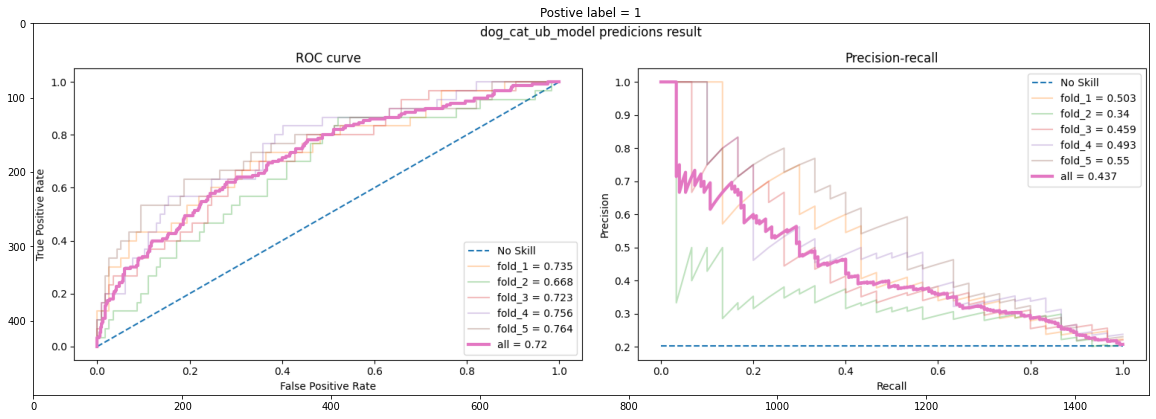

In [9]:
get_datset('dog_cat_no_agumentation_ub.jpg')
get_labels('dog_cat_ub_model/results/dog_cat_ub_model')
get_curves('dog_cat_ub_model/dog_cat_ub_model_predictions_resul_0.png', 0)
get_curves('dog_cat_ub_model/dog_cat_ub_model_predictions_result_1.png', 1)

## Lung

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted label
[1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Probability label
[0.74 0.65 0.54 0.85 0.47 0.66 0.9  0.   0.03 0.61 0.55 0.92 0.67 0.61
 0.01 0.93 0.99 0.68 0.2  0.59 0.44 0.76 0.63 0.64 0.59 0.97 0.95 0.03
 0.82 0.75 0.13 0.68 0.68 0.77 0.62 0.74 0.68 0.7  0.9  0.55 0.88 0.46
 0.71 0.71 0.58 0.65 0.69 0.77 0.67 0.6  0.81 0.63 0.76 0.68 0.92 0.76
 0.91 0.66 0.59 0.66 0.58 0.7  0.62 0.82 0.58 0.72 0.79 0.81 0.8  0.9

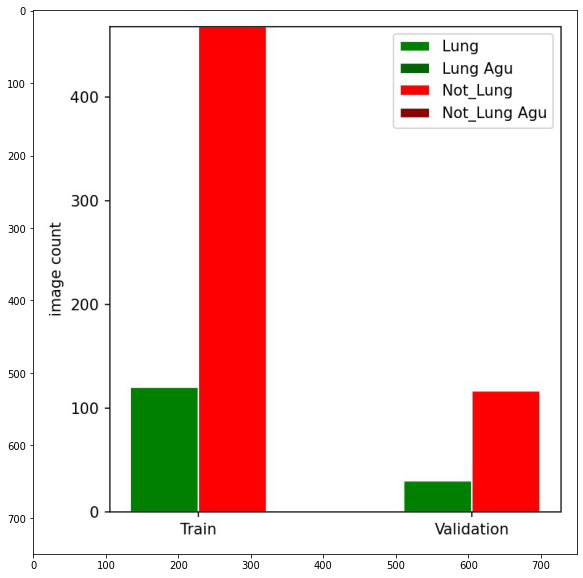

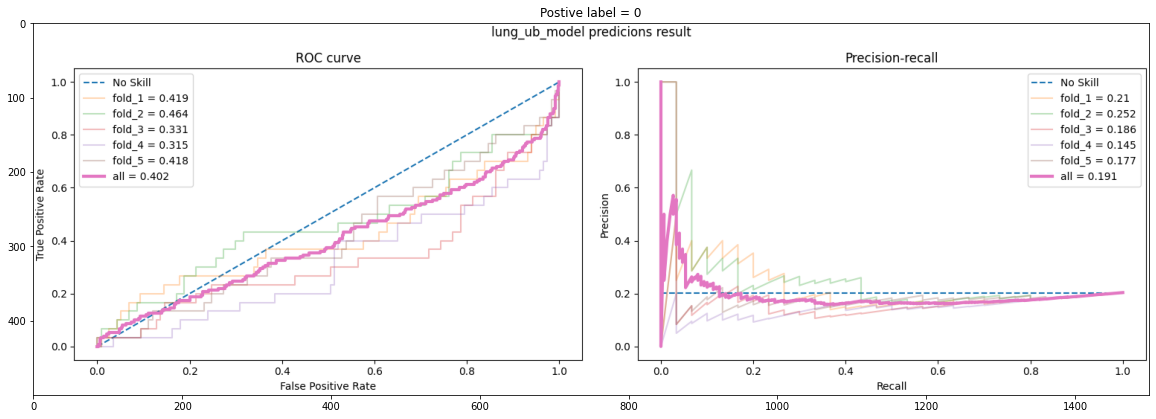

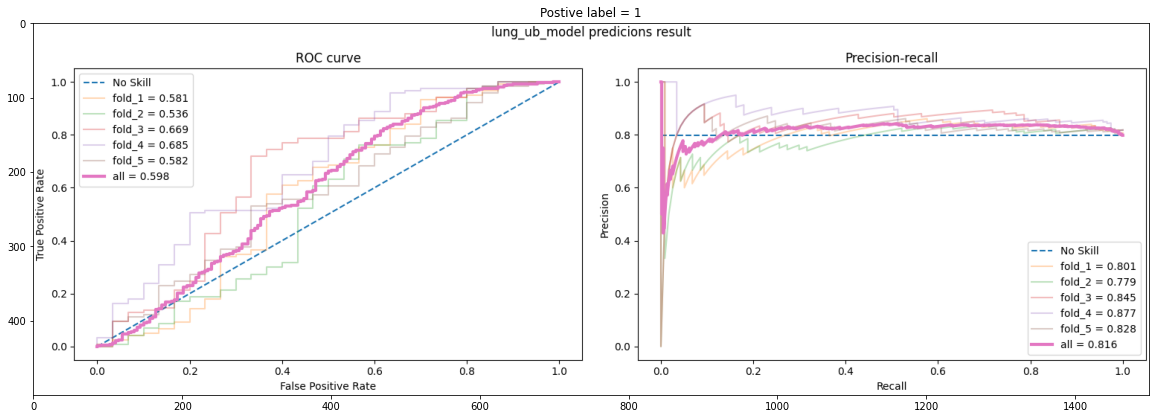

In [10]:
get_datset('Lung_no_agumentation.jpg')
get_labels('lung_ub_model/results/lung_ub_model')
get_curves('lung_ub_model/lung_ub_model_predictions_result_0.png', 0)
get_curves('lung_ub_model/lung_ub_model_predictions_result_1.png', 1)

## Haematopoietic and Lymphoid

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted label
[1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Probability label
[0.97 0.75 0.12 0.65 0.83 0.03 0.29 0.02 0.15 0.02 0.03 0.82 0.47 0.91
 1.   0.98 0.06 0.82 0.91 0.07 0.06 0.04 0.99 0.87 0.04 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.96 1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   0.97 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   

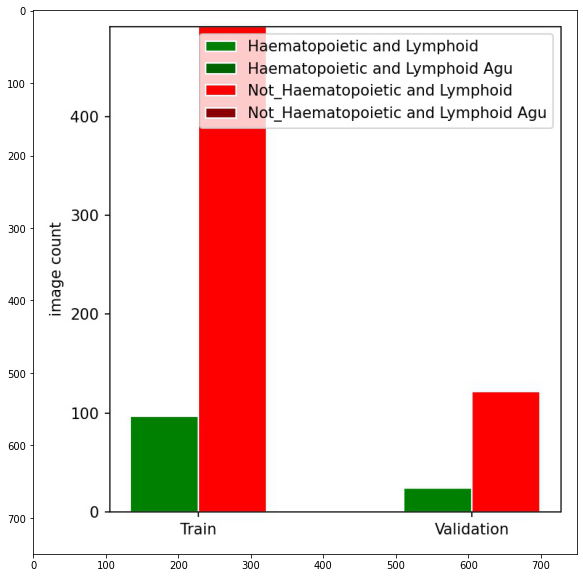

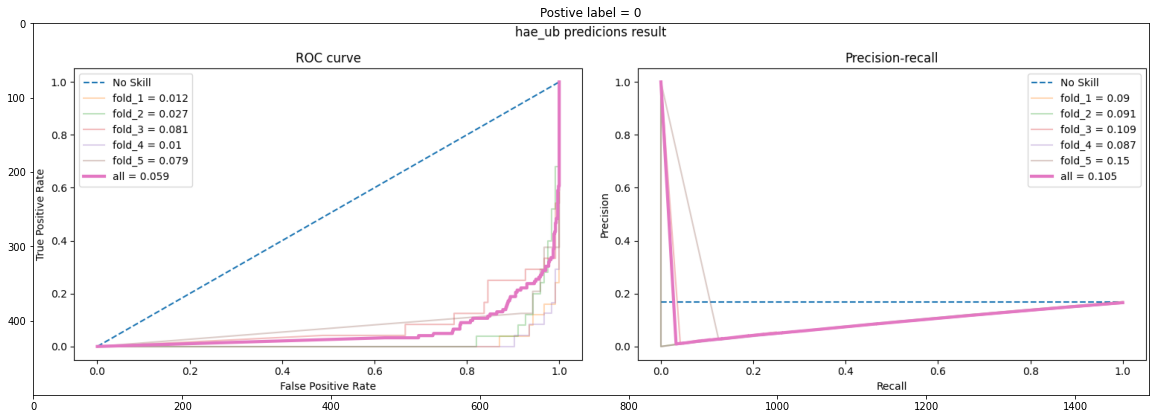

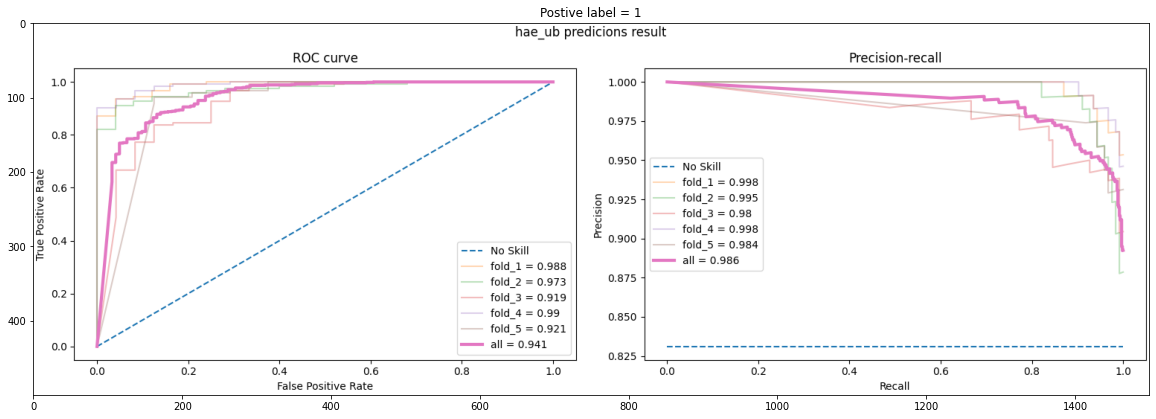

In [11]:
get_datset('Haematopoietic and Lymphoid_no_agumentation.jpg')
get_labels('hae_ub/results/hae_ub')
get_curves('hae_ub/hae_ub_predictions_result_0.png', 0)
get_curves('hae_ub/hae_ub_predictions_result_1.png', 1)

# Train and test augmentation

## Cat dog

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted label
[0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1
 0 0 1 0 1 1 

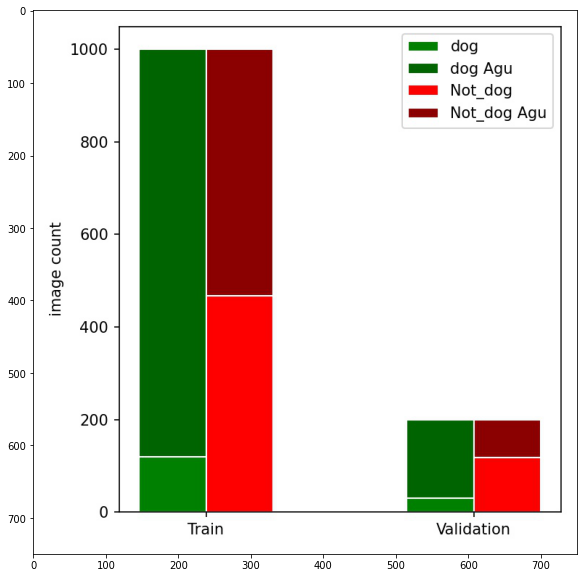

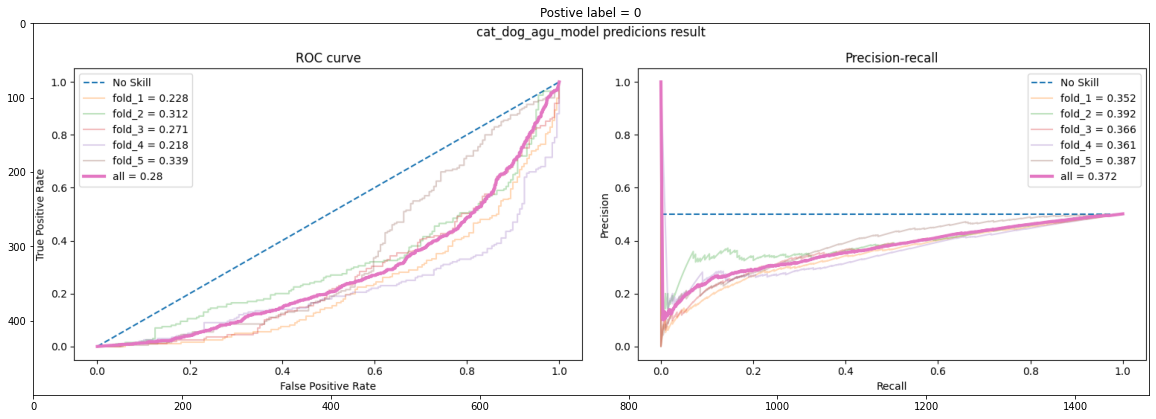

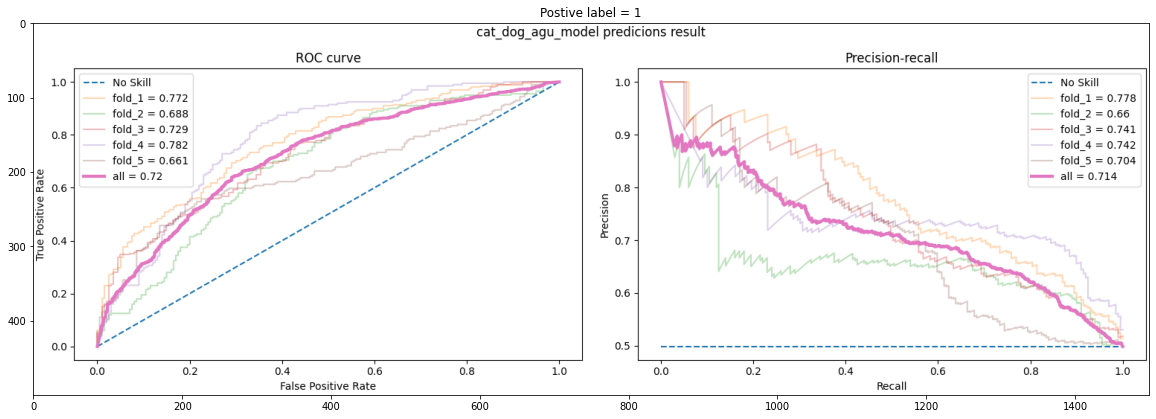

In [12]:
get_datset('dog_cat_train_test_agumented.jpg')
get_labels('cat_dog_agu_model/results/cat_dog_agu_model')
get_curves('cat_dog_agu_model/cat_dog_agu_model_predictions_result_0.png', 0)
get_curves('cat_dog_agu_model/cat_dog_agu_model_predictions_result_1.png', 1)

## Lung

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted label
[1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 1 1 1 0 

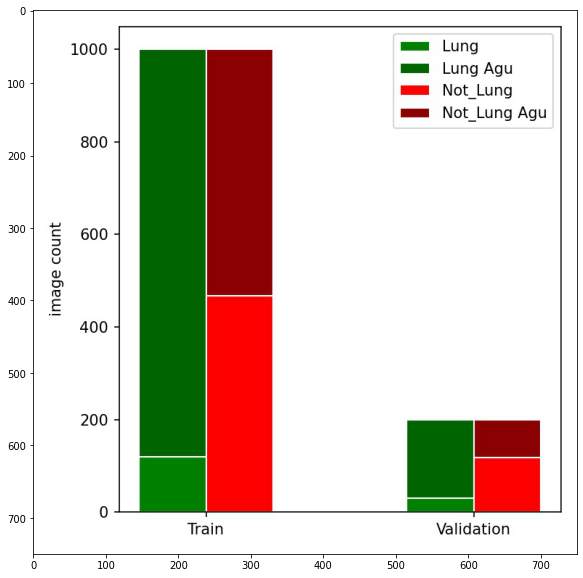

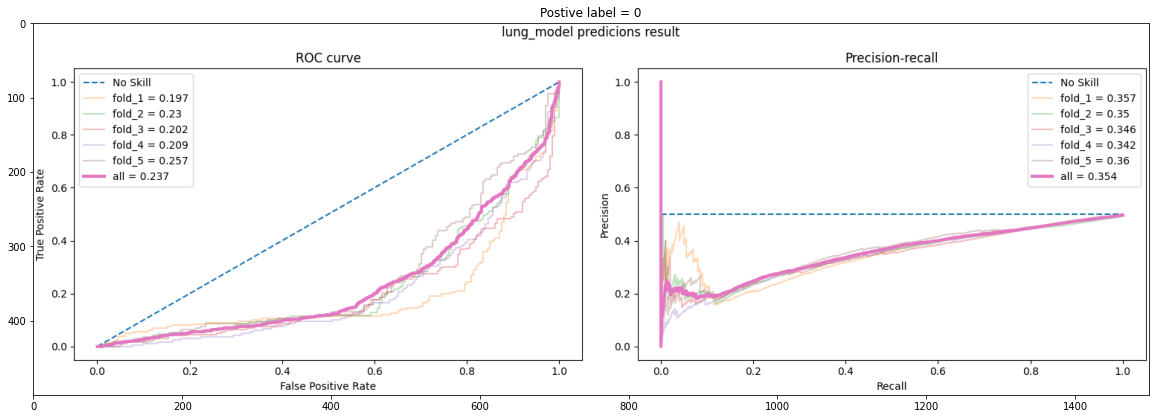

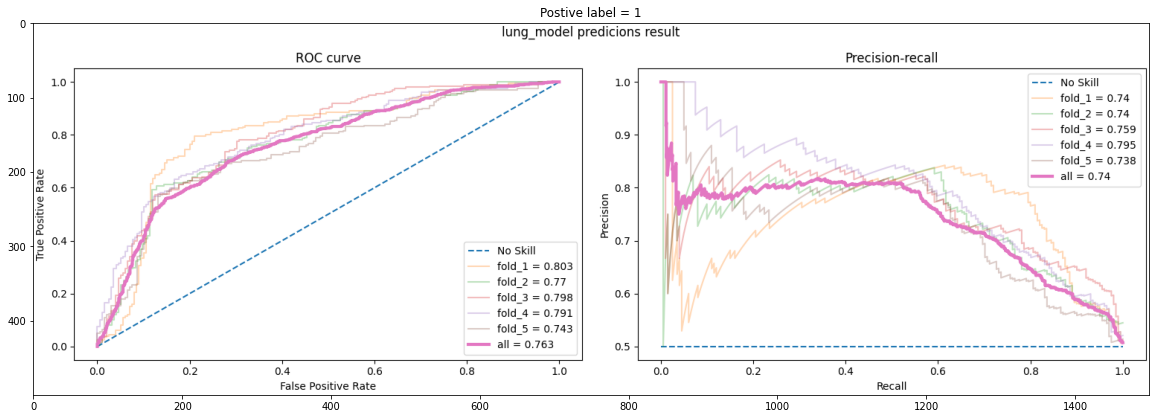

In [13]:
get_datset('Lung_train_test_agumented.jpg')
get_labels('lung_model/results/lung_model')
get_curves('lung_model/lung_model_predictions_result_0.png', 0)
get_curves('lung_model/lung_model_predictions_result_1.png', 1)

## Haematopoietic and Lymphoid

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted label
[1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0
 0 0 1 1 0 

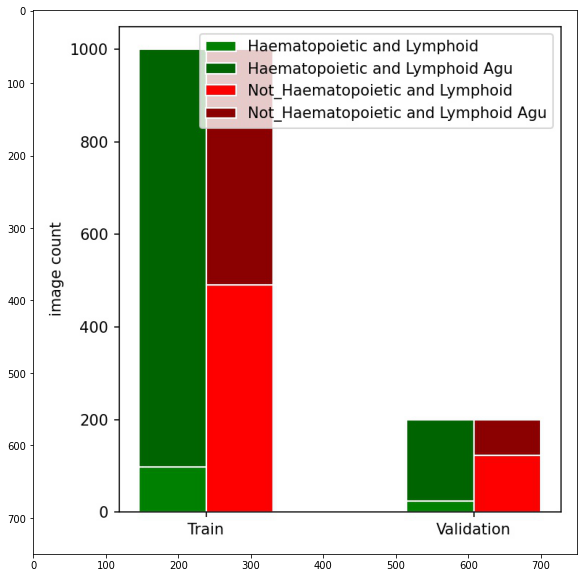

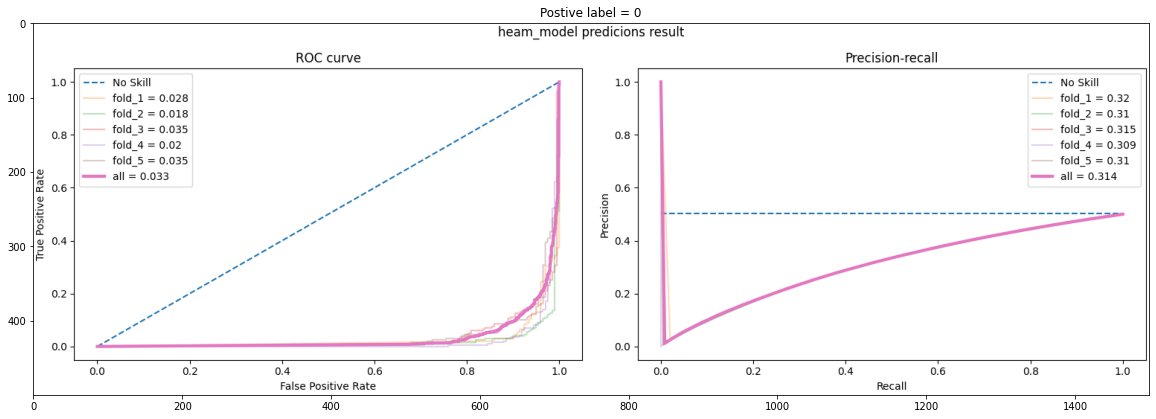

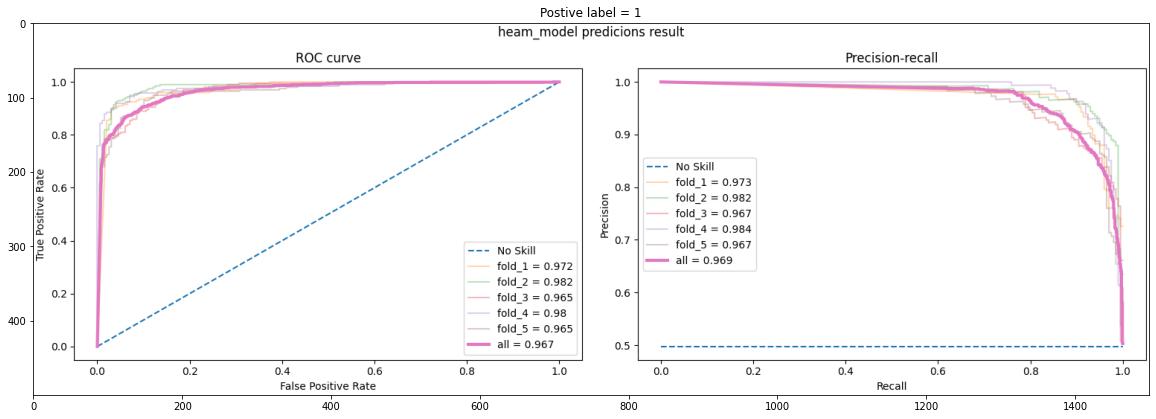

In [14]:
get_datset('Haematopoietic and Lymphoid_train_test_agumented.jpg')
get_labels('heam_model/results/heam_model')
get_curves('heam_model/heam_model_predictions_result_0.png', 0)
get_curves('heam_model/heam_model_predictions_result_1.png', 1)

# Only train augmentation

## Cat dog

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted label
[1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]
Probability label
[0.99 0.69 0.34 0.59 0.   0.95 0.82 0.02 0.3  0.12 0.18 0.   0.   0.03
 0.   0.09 0.18 0.   0.12 0.   0.3  0.08 0.36 0.15 0.   0.68 0.01 0.42
 0.23 0.02 0.3  0.   0.   0.62 0.29 0.   0.44 0.23 0.5  0.22 0.7  0.77
 0.33 0.72 0.   0.01 0.18 0.   0.   0.01 0.   0.21 0.69 0.   0.27 0.55
 0.16 0.   0.03 0.   0.33 0.07 0.87 0.43 0.29 0.   0.   0.   0.44 1.


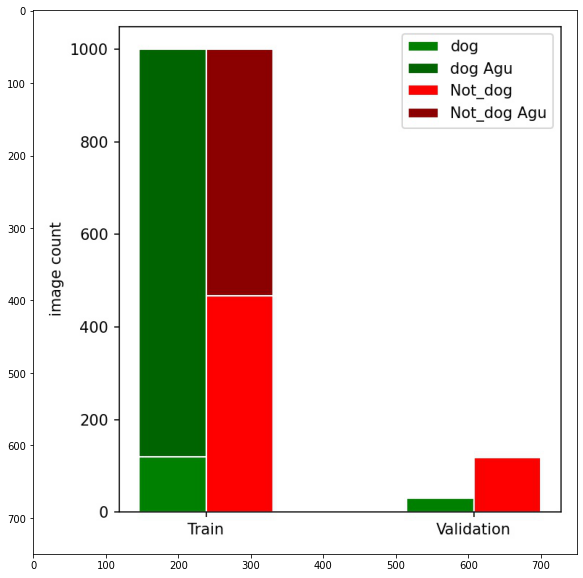

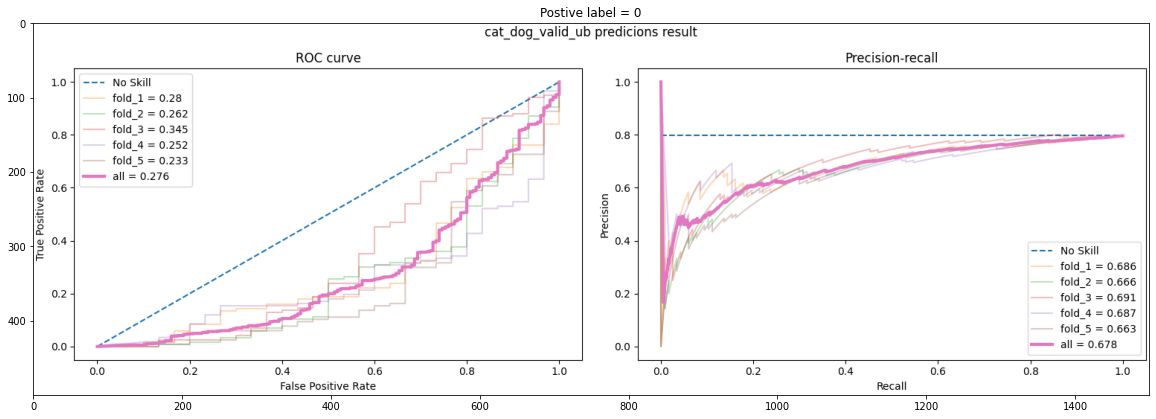

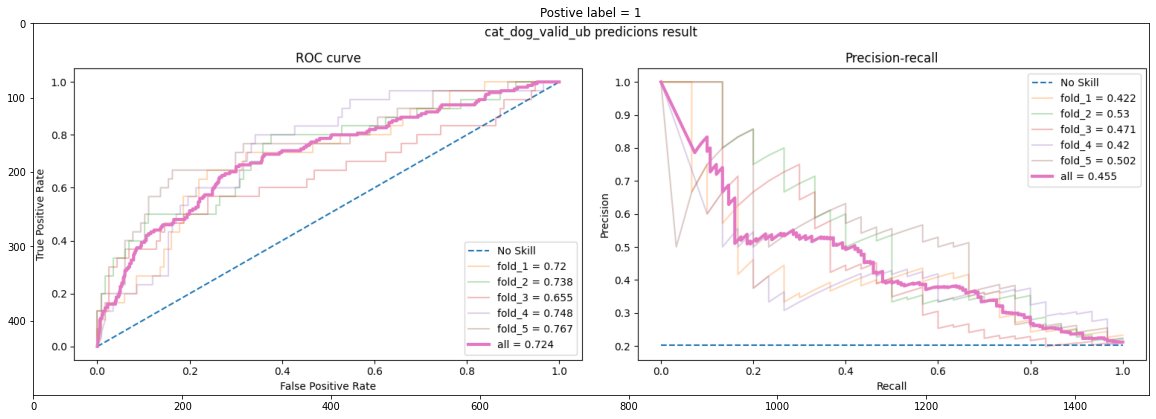

In [15]:
get_datset('dog_cat_only_train_agumented.jpg')
get_labels('cat_dog_valid_ub/results/cat_dog_valid_ub')
get_curves('cat_dog_valid_ub/cat_dog_valid_ub_predictions_result_0.png', 0)
get_curves('cat_dog_valid_ub/cat_dog_valid_ub_predictions_result_1.png', 1)

## Lung

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted label
[1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Probability label
[1.   1.   0.16 0.13 1.   1.   0.95 0.   0.08 0.99 1.   0.94 0.99 0.91
 0.04 0.99 0.98 0.95 0.61 0.55 1.   0.89 0.99 0.93 0.75 0.98 0.97 0.24
 0.95 0.66 0.33 0.98 0.81 0.83 0.98 0.7  1.   1.   0.98 1.   0.86 0.48
 0.98 1.   0.44 0.43 0.69 1.   1.   0.77 0.57 0.63 0.99 0.96 0.99 0.71
 0.91 0.96 0.65 0.99 0.4  0.54 0.96 1.   0.99 0.74 0.83 0.71 0.67 0.6

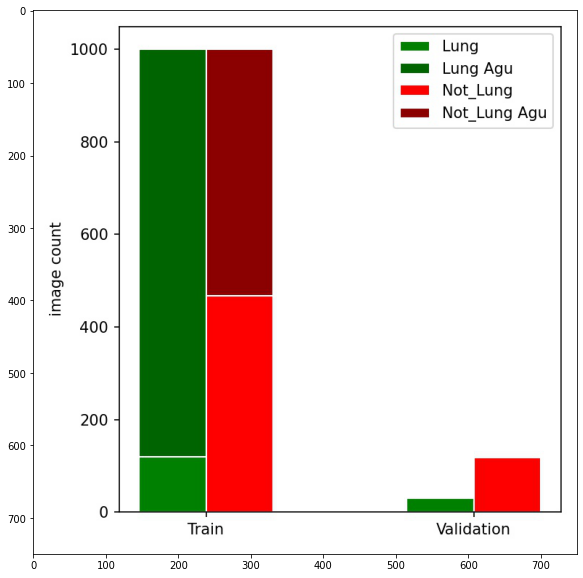

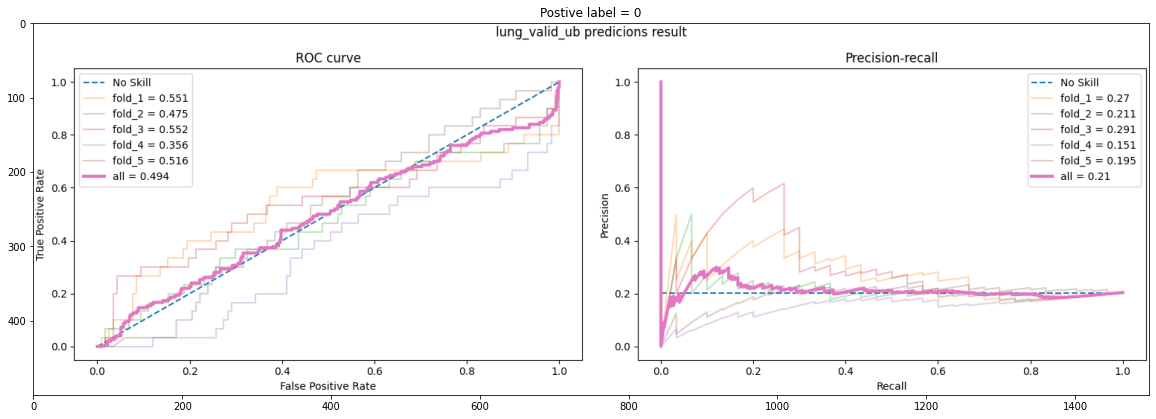

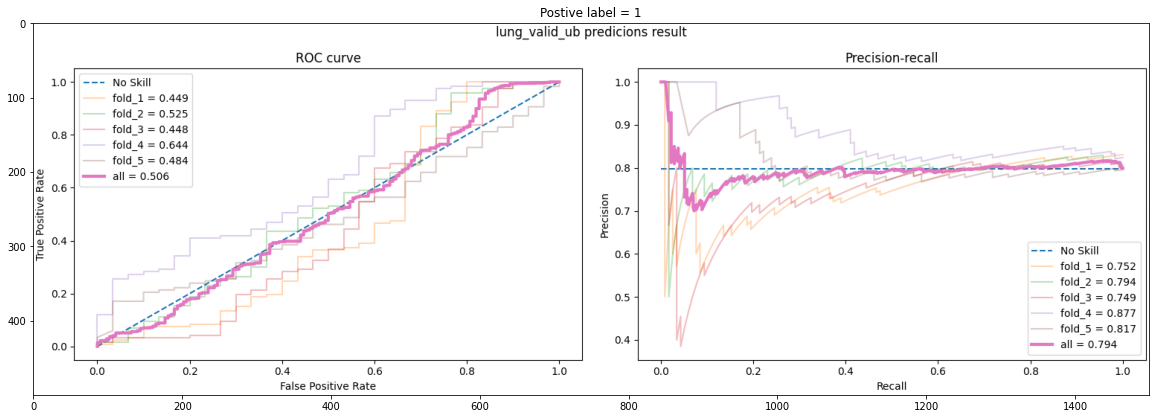

In [16]:
get_datset('Lung_only_train_agumented.jpg')
get_labels('lung_valid_ub/results/lung_valid_ub')
get_curves('lung_valid_ub/lung_valid_ub_predictions_result_0.png', 0)
get_curves('lung_valid_ub/lung_valid_ub_predictions_result_1.png', 1)

## Haematopoietic and Lymphoid

True label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted label
[1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Probability label
[0.94 0.84 0.87 0.96 0.97 0.32 0.14 0.25 0.59 0.06 0.02 0.94 0.17 0.99
 1.   0.54 0.55 0.73 0.75 0.22 0.4  0.37 1.   1.   0.27 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.91 0.99 1.   1.   1.   1.   1.   1.   1.
 1.   1.   0.97 1.   1.   1.   1.   1.   1.   0.98 1.   1.   1.   1.
 1.   

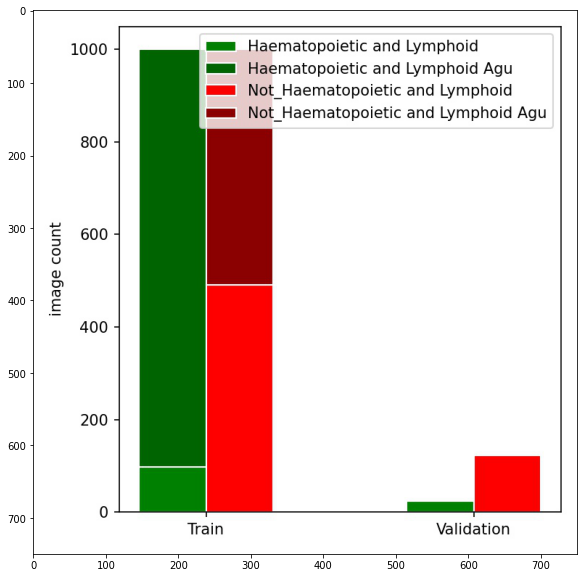

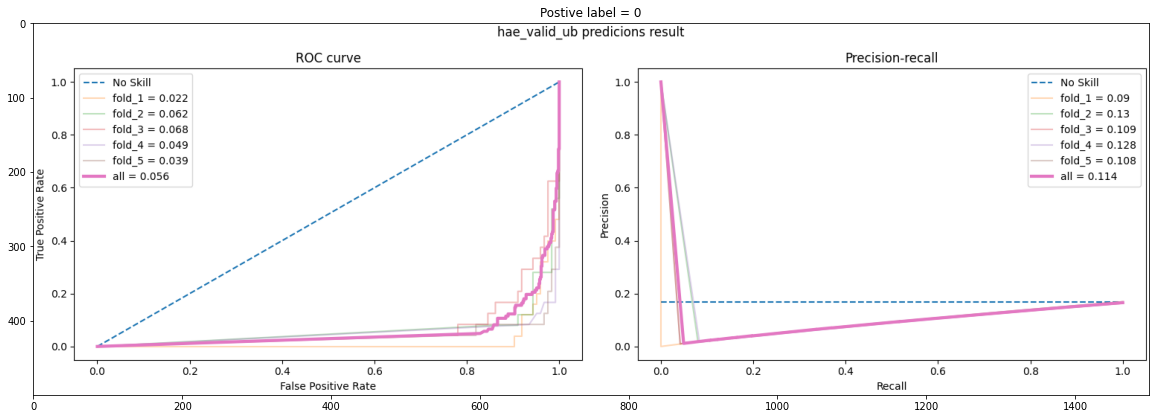

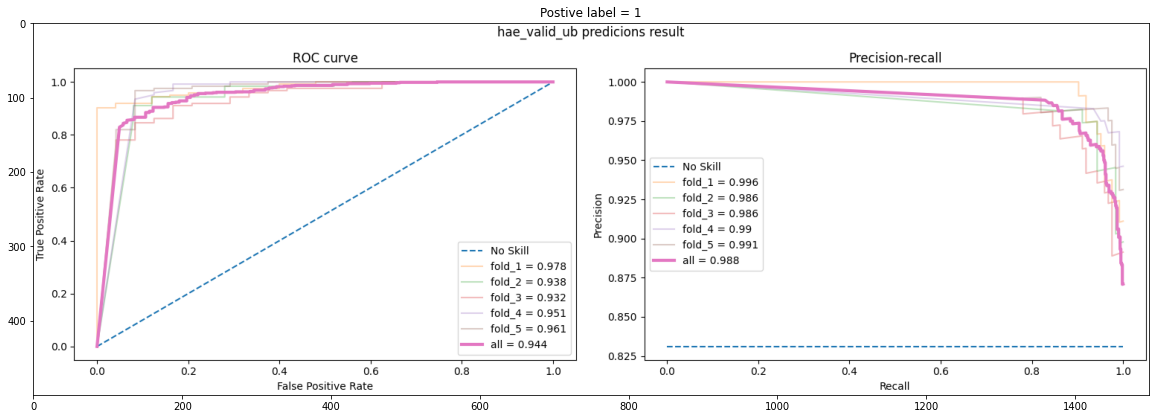

In [17]:
get_datset('Haematopoietic and Lymphoid_only_train_agumented.jpg')
get_labels('hae_valid_ub/results/hae_valid_ub')
get_curves('hae_valid_ub/hae_valid_ub_predictions_result_0.png', 0)
get_curves('hae_valid_ub/hae_valid_ub_predictions_result_1.png', 1)